# Regresión multivariable

Obtenemos datos de ventas de coches (ficticios)

   unnamed: 0     tv  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


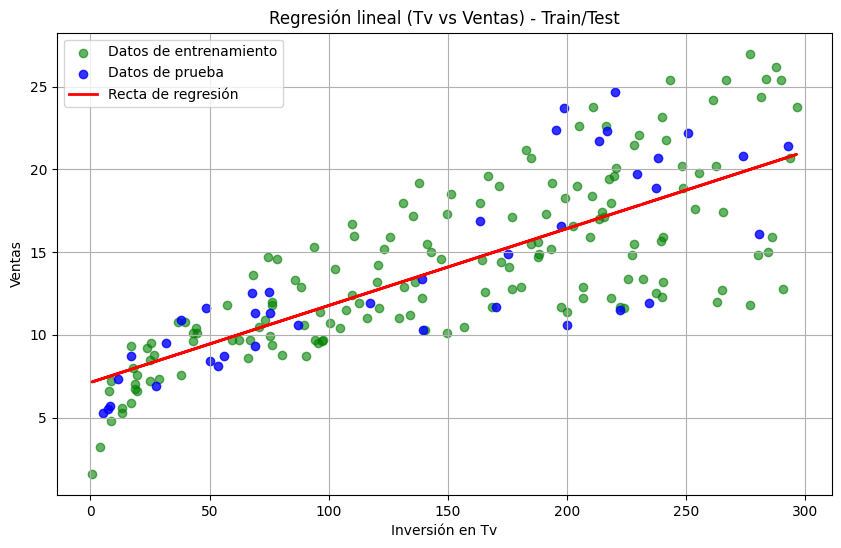

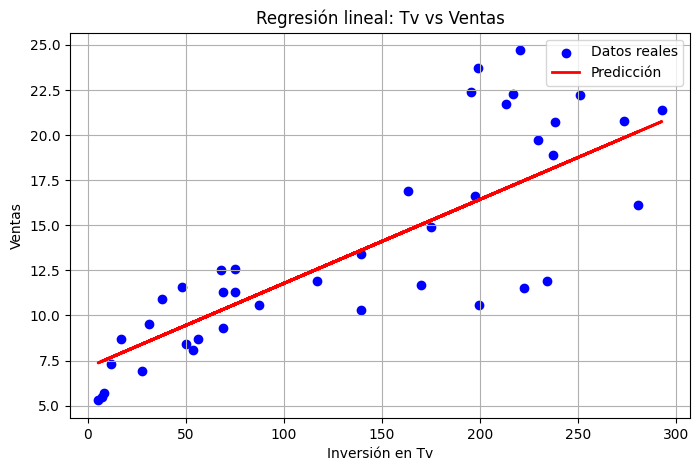

R² Tv: 0.6767

Multivariable (estandarizado): 0.8994
    Variable  Coeficiente (Estandarizado)
0         TV                     3.830606
1      Radio                     2.801912
2  Newspaper                     0.059983

Variable menos importante: Newspaper

Ecuación del modelo múltiple:
Ventas = 14.04 + (3.83)*tv + (2.80)*radio + (0.06)*newspaper

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('.\\datos\\Advertising.xls')
df.columns = df.columns.str.strip().str.lower()

print(df.head())

def analizar_variable(nombre_variable):
    #dividimos entrenamiento y prueba / 80% 20%
    X = df[[nombre_variable]] #independiente
    y = df['sales'] #dependiente
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #creamos y entrenamos el modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    #graficamos modelo general
    y_pred_all = modelo.predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X_train, y_train, color='green', alpha=0.6, label='Datos de entrenamiento')
    plt.scatter(X_test, y_test, color='blue', alpha=0.8, label='Datos de prueba')
    plt.plot(X, y_pred_all, color='red', linewidth=2, label='Recta de regresión')
    plt.title(f'Regresión lineal ({nombre_variable.capitalize()} vs Ventas) - Train/Test')
    plt.xlabel(f'Inversión en {nombre_variable.capitalize()}')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

    #graficamos modelo (solo test)
    y_pred_test = modelo.predict(X_test)

    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, color='blue', label='Datos reales')
    plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Predicción')
    plt.title(f'Regresión lineal: {nombre_variable.capitalize()} vs Ventas')
    plt.xlabel(f'Inversión en {nombre_variable.capitalize()}')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

    #calculamos coeficiente
    r2 = r2_score(y_test, y_pred_test)
    print(f"R² {nombre_variable.capitalize()}: {r2:.4f}\n")

analizar_variable('tv')

#realizamos lo mismo pero multi variable
X_full = df[['tv', 'radio', 'newspaper']]
y = df['sales']

# estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

#reparto de entrenamiento y prueba
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#creamos el modelo y lo entrenamos
modelo_full = LinearRegression()
modelo_full.fit(X_train_f, y_train_f)

#graficamos
y_pred_full = modelo_full.predict(X_test_f)
r2_full = r2_score(y_test_f, y_pred_full)
print(f"Multivariable (estandarizado): {r2_full:.4f}")

coeficientes = pd.DataFrame({
    'Variable': ['TV', 'Radio', 'Newspaper'],
    'Coeficiente (Estandarizado)': modelo_full.coef_
})
print(coeficientes)

#buscamos la variable menos importante
menos_importante = coeficientes.loc[coeficientes['Coeficiente (Estandarizado)'].abs().idxmin(), 'Variable']
print(f"\nVariable menos importante: {menos_importante}")

#creamos la formula
interseccion = modelo_full.intercept_
print(f"\nEcuación del modelo múltiple:")
print(f"Ventas = {interseccion:.2f}", end='')
for var, coef in zip(X_full.columns, modelo_full.coef_):
    print(f" + ({coef:.2f})*{var}", end='')